Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create a dataset

Define some parameters for the loader:

In [2]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

In [4]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 9 classes.


In [5]:
len(train_ds)

70

In [6]:
# train dataset belong classe name 
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Test',
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


In [8]:
len(val_ds)

4

In [12]:
# test dataset belong class name 
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [13]:
# Shown in tensor format as the data is multidimensional
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
# Converting to a simpler format to see the sizes and dimensions of the data
for image_batch , lable_batch in val_ds.take(1) :
    print('Batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('Label shape :',lable_batch.shape)


Batch shape : (32, 180, 180, 3)
Label shape : (32,)


In [16]:
# normal form
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('Labels in numeric format : ',label_batch.numpy())

[[[[120.312225 103.0563   102.44444 ]
   [132.67001  105.466675 103.37    ]
   [137.31853  114.477776 117.69814 ]
   ...
   [173.46527  142.92995  144.94063 ]
   [178.16449  139.72781  147.12892 ]
   [168.6555   137.32103  131.8103  ]]

  [[128.24     103.71001  105.88555 ]
   [132.90334  112.00667  109.19666 ]
   [141.23889  116.672226 115.03333 ]
   ...
   [176.42226  142.17236  142.02803 ]
   [171.3367   144.6367   148.63    ]
   [178.61888  141.15236  142.01889 ]]

  [[129.86482  110.73889  105.80741 ]
   [139.16112  110.494446 115.13333 ]
   [140.7963   121.65741  117.833336]
   ...
   [177.       137.68523  141.06462 ]
   [172.57222  137.23889  141.90556 ]
   [170.80185  139.39629  135.21101 ]]

  ...

  [[118.92765   91.50367   80.76139 ]
   [120.09984   99.60008   78.76683 ]
   [132.40717   97.72214   78.72214 ]
   ...
   [170.2595   152.3335   147.9724  ]
   [167.28905  146.00586  145.66086 ]
   [161.72948  135.39598  135.6848  ]]

  [[103.16425   87.86777   78.4356  ]
   [116

In [17]:

class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
[1 7 5 5 1 0 6 4 7 2 6 7 5 5 7 5 3 5 0 3 3 6 5 5 3 5 4 1 2 4 7 7]


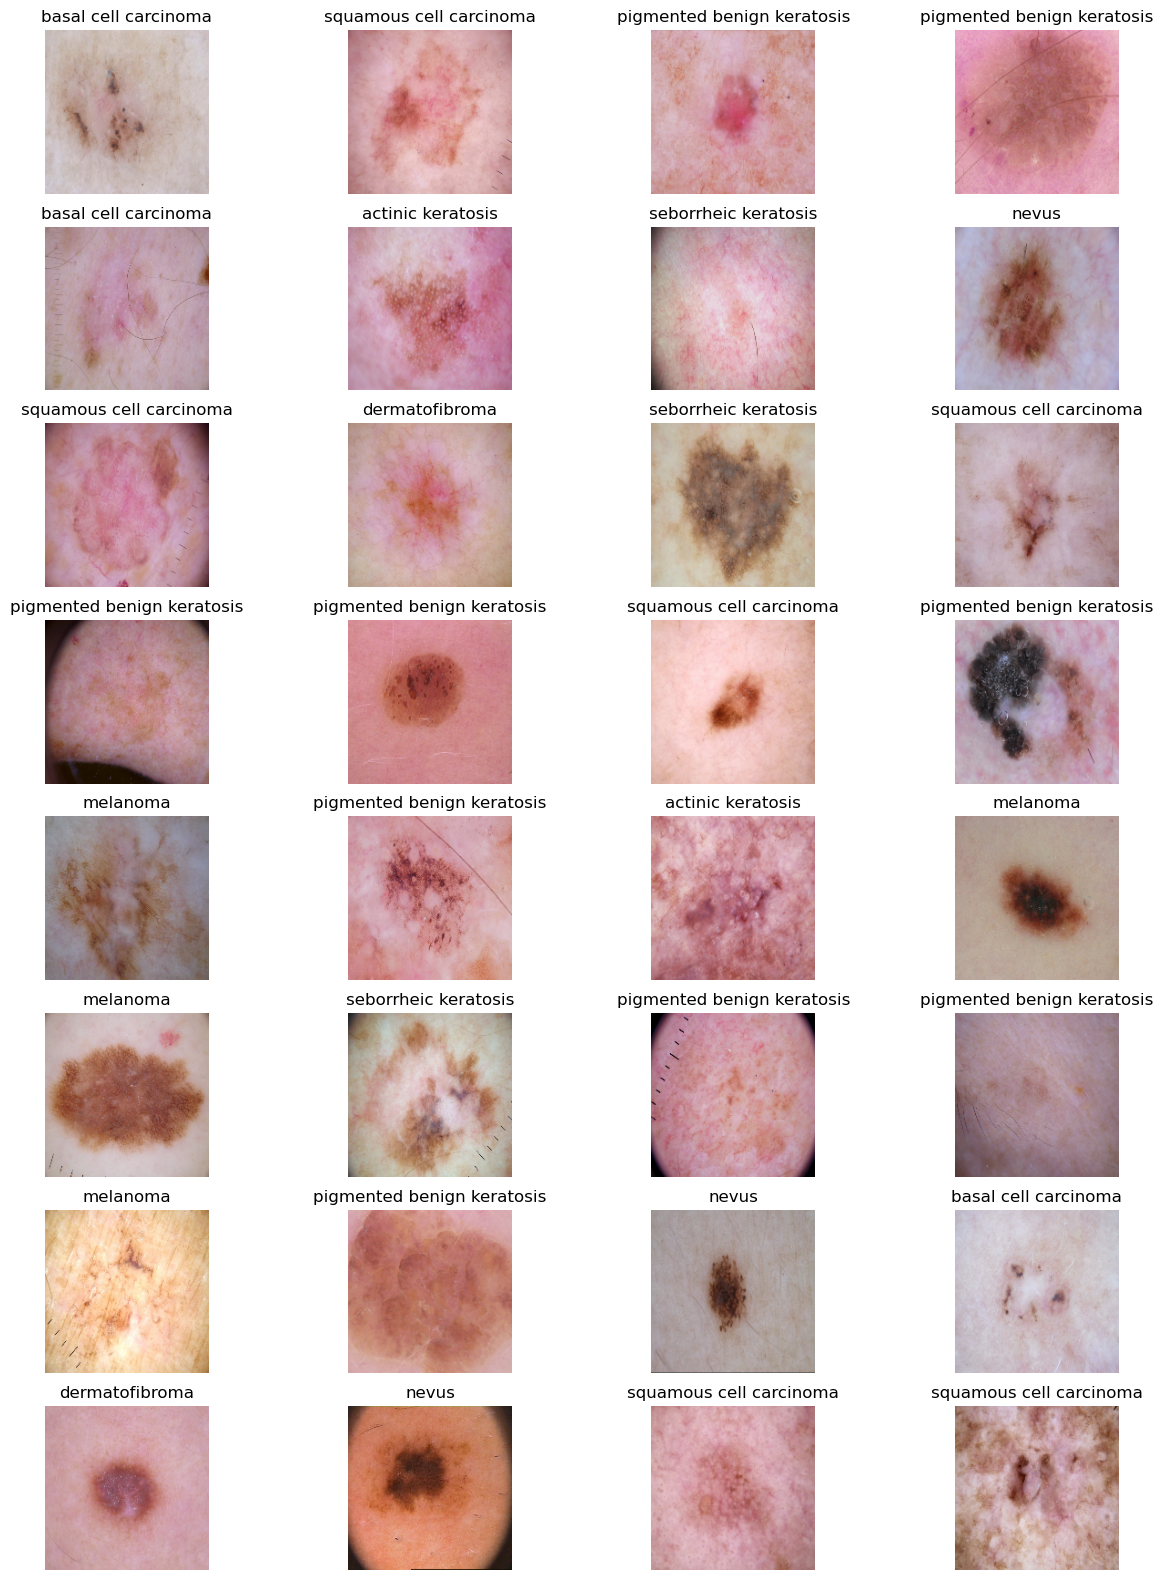

In [18]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
# increases the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [20]:
# resize and rescale the value 
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
# data augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [23]:
input_shape = (batch_size , img_height , img_width , channels)

In [24]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [25]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.build(input_shape)

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        36928     
                                                      

### Train the model

In [28]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 166s 2s/step - loss: 2.1193 - accuracy: 0.1916 - val_loss: 2.2222 - val_accuracy: 0.1864
Epoch 2/20
70/70 [==============================] - 142s 2s/step - loss: 1.9254 - accuracy: 0.2827 - val_loss: 2.2391 - val_accuracy: 0.2966
Epoch 3/20
70/70 [==============================] - 143s 2s/step - loss: 1.7266 - accuracy: 0.3770 - val_loss: 2.1072 - val_accuracy: 0.2966
Epoch 4/20
70/70 [==============================] - 147s 2s/step - loss: 1.6078 - accuracy: 0.4270 - val_loss: 2.1001 - val_accuracy: 0.3051
Epoch 5/20
70/70 [==============================] - 146s 2s/step - loss: 1.5397 - accuracy: 0.4600 - val_loss: 2.0464 - val_accuracy: 0.2881
Epoch 6/20
70/70 [==============================] - 158s 2s/step - loss: 1.5226 - accuracy: 0.4730 - val_loss: 2.1135 - val_accuracy: 0.3644
Epoch 7/20
70/70 [==============================] - 157s 2s/step - loss: 1.4150 - accuracy: 0.5047 - val_loss: 2.0355 - val_accuracy: 0.3390
Epoch 8/20
70

In [29]:
# accuracy of model each epochs
history.history['accuracy']

[0.1916033923625946,
 0.28271549940109253,
 0.37695398926734924,
 0.4269763231277466,
 0.4600268006324768,
 0.47297900915145874,
 0.5046895742416382,
 0.4993300437927246,
 0.5346136689186096,
 0.5439928770065308,
 0.5364001989364624,
 0.5399731993675232,
 0.5640910863876343,
 0.5404198169708252,
 0.5614113211631775,
 0.5502456426620483,
 0.5654309988021851,
 0.5770432949066162,
 0.5765966773033142,
 0.5743635296821594]

In [30]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.18644067645072937,
 0.29661017656326294,
 0.29661017656326294,
 0.3050847351551056,
 0.2881355881690979,
 0.3644067943096161,
 0.33898305892944336,
 0.31355932354927063,
 0.27966102957725525,
 0.3305084705352783,
 0.31355932354927063,
 0.347457617521286,
 0.4406779706478119,
 0.38983049988746643,
 0.38983049988746643,
 0.35593220591545105,
 0.37288135290145874,
 0.4067796468734741,
 0.347457617521286,
 0.38983049988746643]

In [31]:
# loss
history.history['loss']

[2.1192879676818848,
 1.9253923892974854,
 1.7266119718551636,
 1.6077836751937866,
 1.5396692752838135,
 1.522563099861145,
 1.4150193929672241,
 1.407525897026062,
 1.3501744270324707,
 1.3312445878982544,
 1.3270187377929688,
 1.305801272392273,
 1.2578425407409668,
 1.3254472017288208,
 1.2539643049240112,
 1.2662980556488037,
 1.2419114112854004,
 1.2118198871612549,
 1.1945650577545166,
 1.1823257207870483]

### Visualizing training results

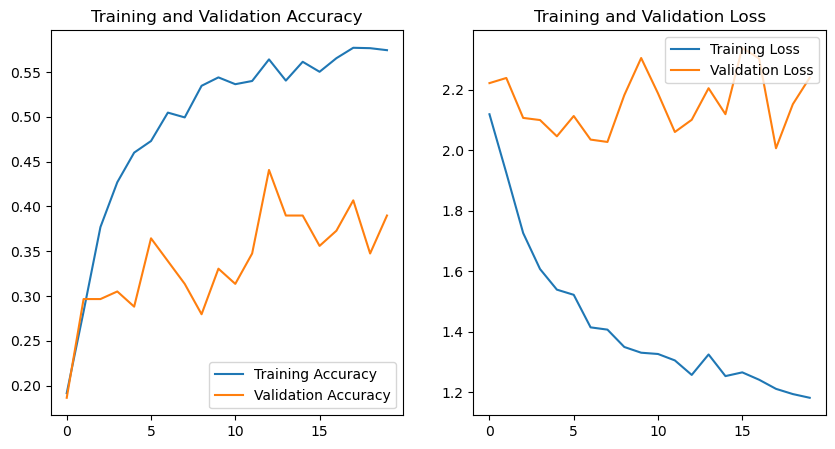

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
`Traning-accuracy = 57` and 

`validation-accuracy = 38` 

The model does not perform well on neither the training dataset nor the testing dataset
We can say that this model is underfitting at the moment

### Write your findings here

In [33]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

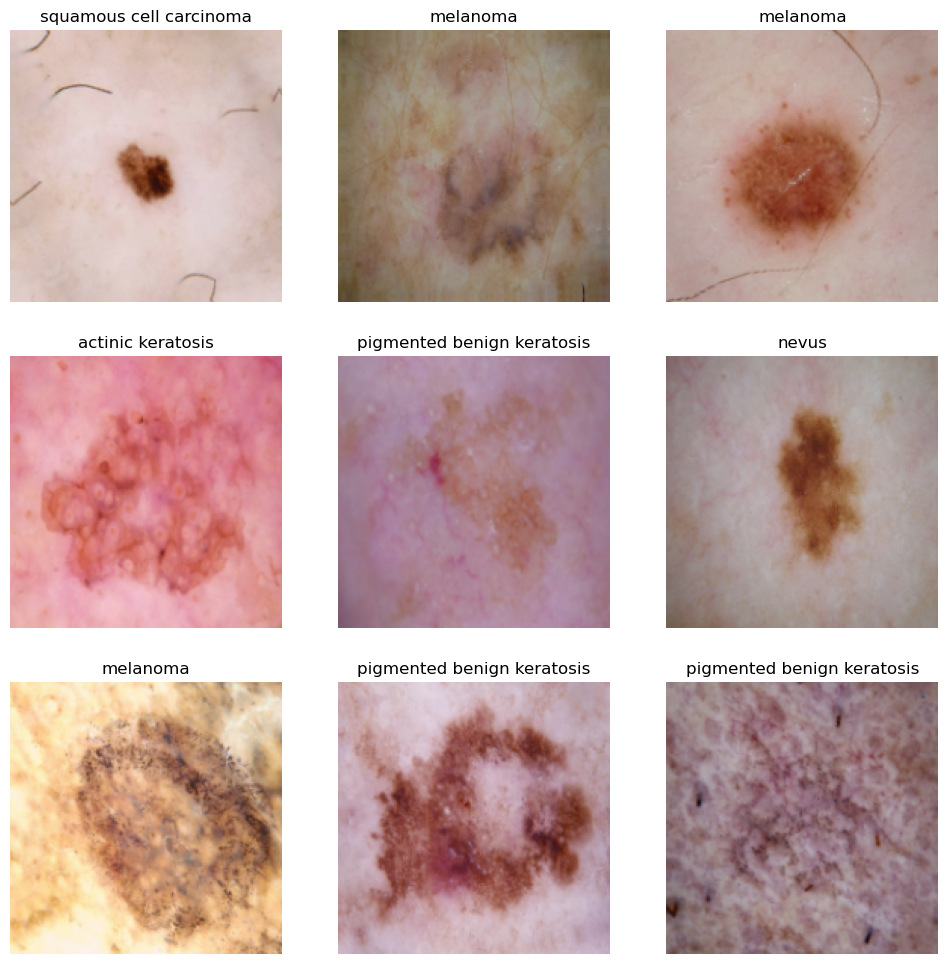

In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

### Compiling the model

In [36]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 46s 592ms/step - loss: 1.8357 - accuracy: 0.3345 - val_loss: 2.0042 - val_accuracy: 0.1864
Epoch 2/20
70/70 [==============================] - 41s 582ms/step - loss: 1.5469 - accuracy: 0.4658 - val_loss: 2.0751 - val_accuracy: 0.2712
Epoch 3/20
70/70 [==============================] - 40s 578ms/step - loss: 1.4266 - accuracy: 0.4895 - val_loss: 2.1517 - val_accuracy: 0.3729
Epoch 4/20
70/70 [==============================] - 41s 583ms/step - loss: 1.4124 - accuracy: 0.5065 - val_loss: 2.1501 - val_accuracy: 0.3983
Epoch 5/20
70/70 [==============================] - 43s 616ms/step - loss: 1.3271 - accuracy: 0.5288 - val_loss: 2.5561 - val_accuracy: 0.3051
Epoch 6/20
70/70 [==============================] - 40s 578ms/step - loss: 1.3275 - accuracy: 0.5333 - val_loss: 2.1212 - val_accuracy: 0.3051
Epoch 7/20
70/70 [==============================] - 42s 600ms/step - loss: 1.2663 - accuracy: 0.5444 - val_loss: 2.2571 - val_accuracy: 0.3814

### Visualizing the results

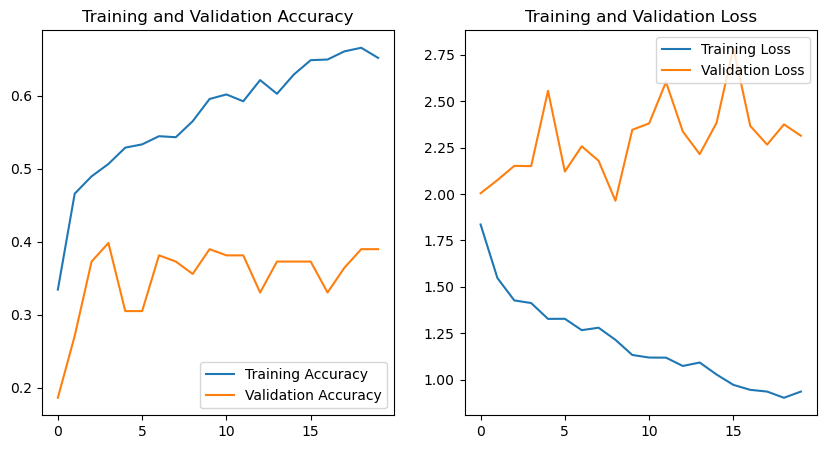

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

 

`Training accuracy = 65 ` and 

`Validation accuracy = 38 `

The model seems to perform a bit better than the baseline model as there is some increase in the training accuracy and considerably small to no change in the validation accuracy

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [55]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [39]:
data_dir_train = pathlib.Path(r"C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train")


In [40]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [41]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))


In [42]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

<BarContainer object of 9 artists>

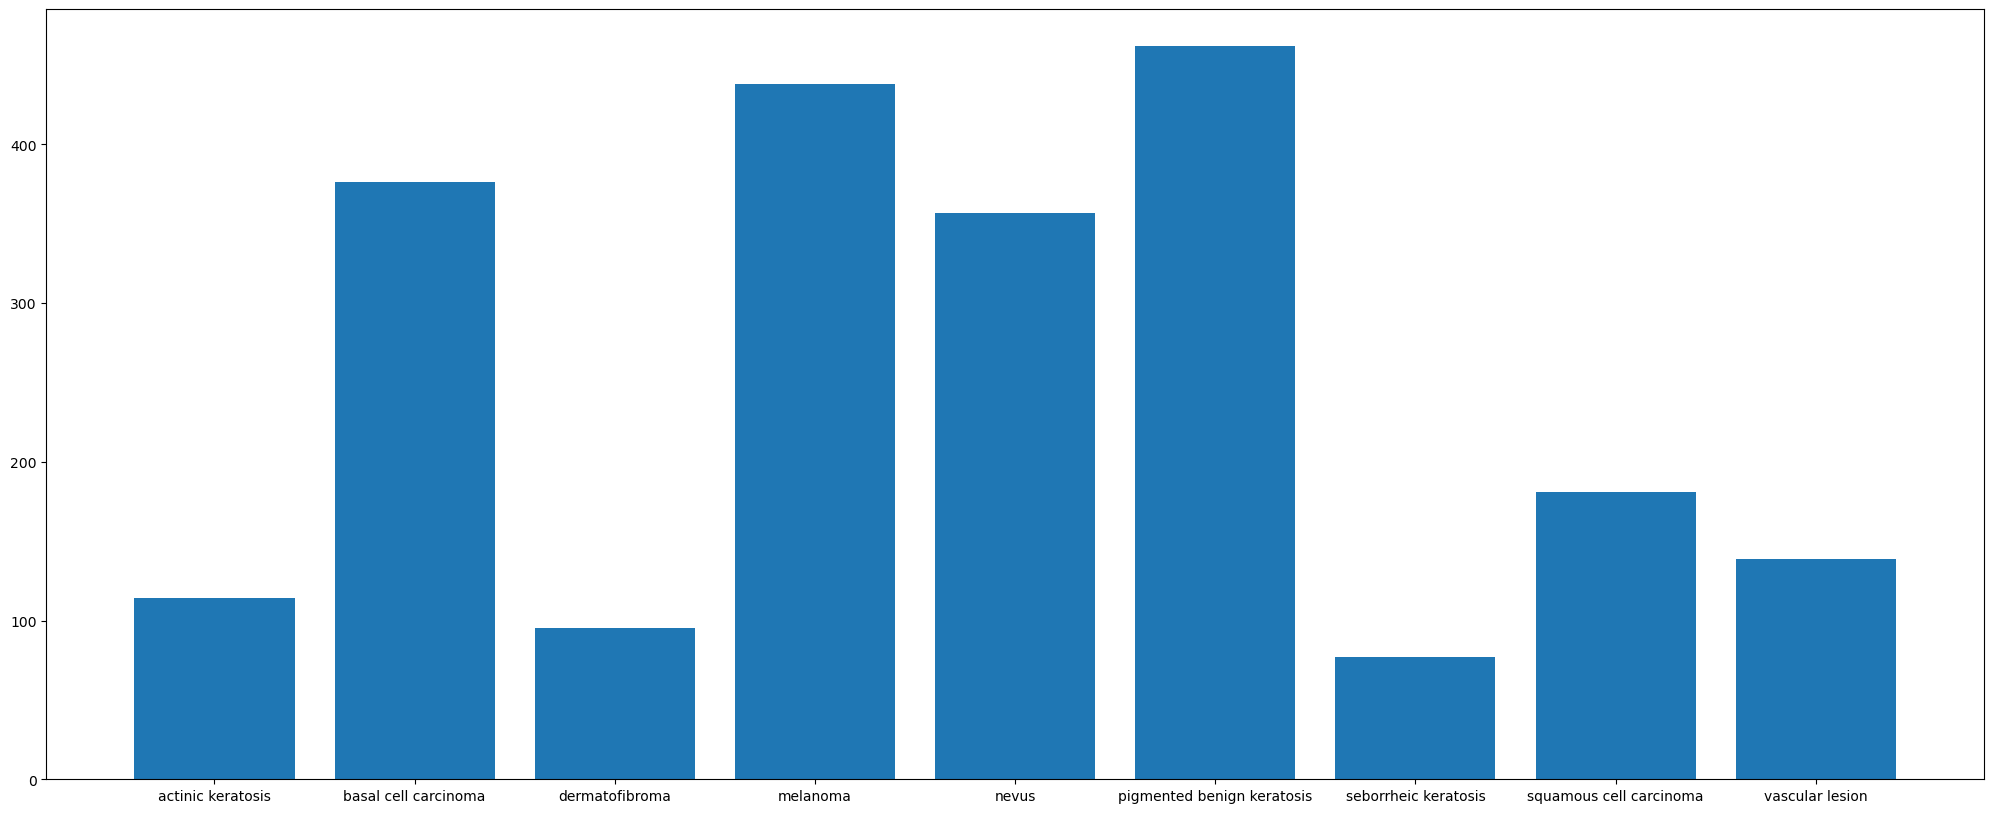

In [43]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- Seborrheic Keratosis seems to have the lowest number of samples in the dataset
- Melanoma and Pigmented skin keratosis seem to dominate the data

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [44]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x273A34D40A0>: 100%|█| 500/500 [00:03<00:


Initialised with 376 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x273A3518370>: 100%|█| 500/500 [00:05<00:00, 97.31 Samples/


Initialised with 95 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x273A3431430>: 100%|█| 500/500 [00:07<00:


Initialised with 438 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x273A348A0D0>: 100%|█| 500/500 [00:29<00


Initialised with 357 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x273935FBAF0>: 100%|█| 500/500 [00:27<00:00, 18.36 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x273A325DE80>: 100%|█| 500/500 [00:06<00:


Initialised with 77 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x273A36EE550>: 100%|█| 500/500 [00:14<00:00, 33.93 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x273A3236250>: 100%|█| 500/500 [00:06<00:00, 75.76 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\PRATIK\OneDrive\Desktop\UpGrad\Neural Networks\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x273A325DF40>: 100%|█| 500/500 [00:06<00:00, 78.59 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [46]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Lets see the distribution of augmented data after adding new images to the original training data.


<BarContainer object of 9 artists>

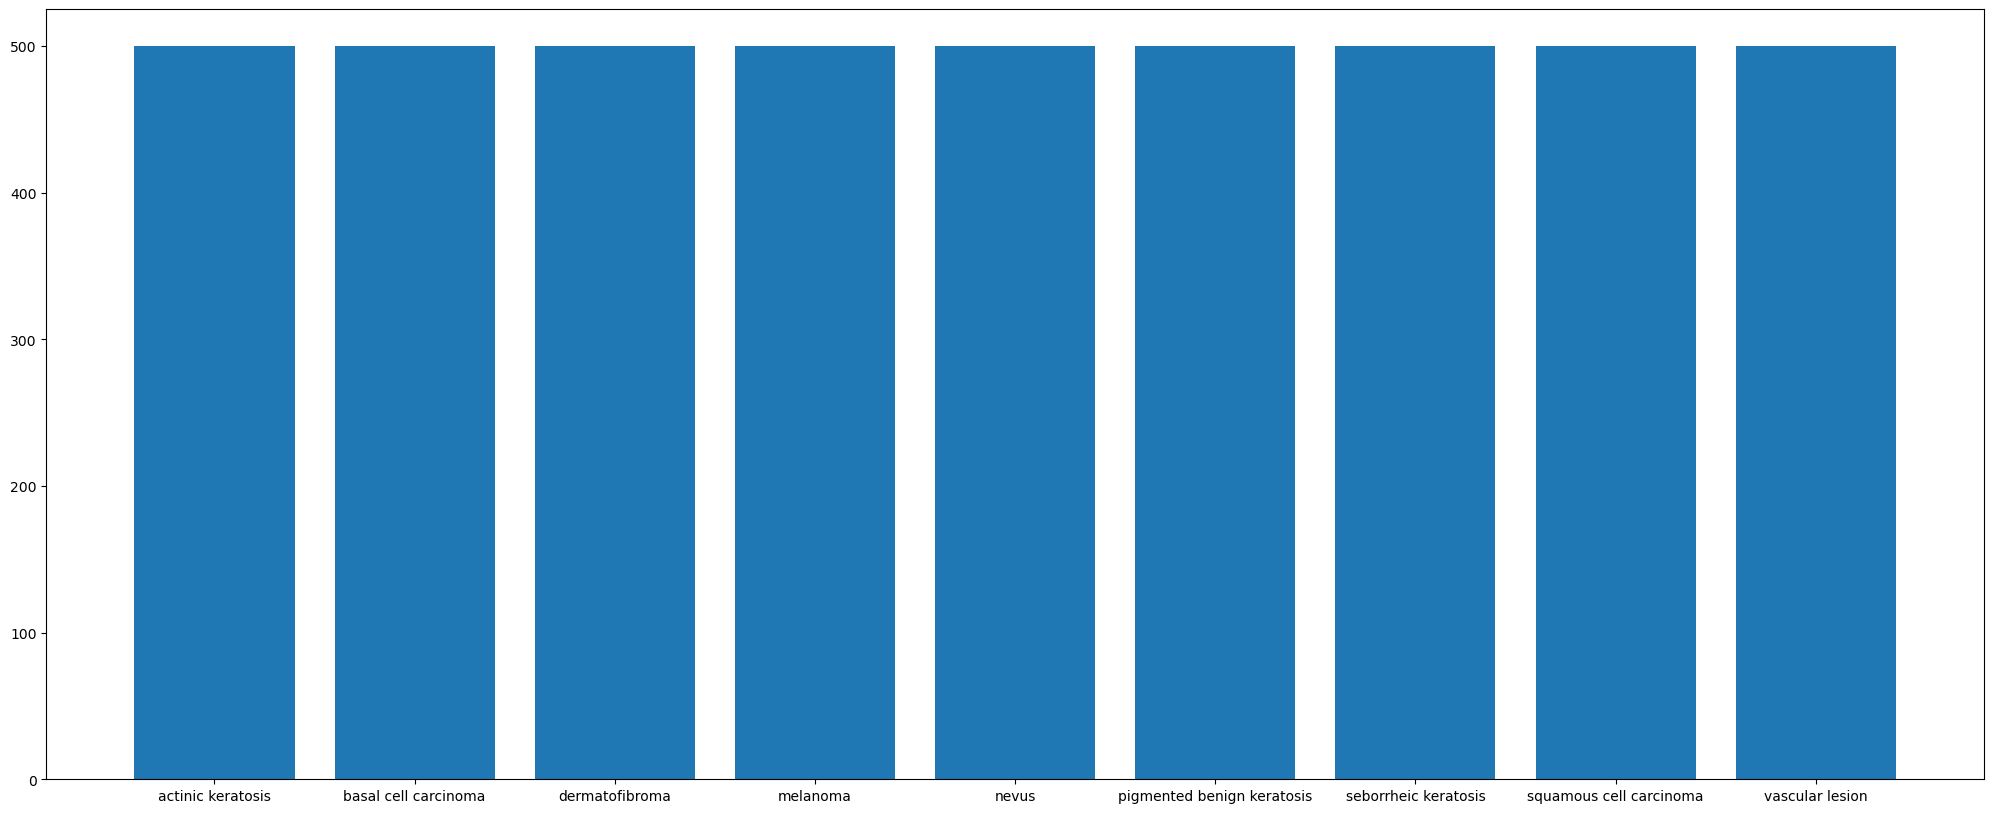

In [47]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
import os
from glob import glob

In [50]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\PRATIK\\OneDrive\\Desktop\\UpGrad\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8d7e6021-9965-47c8-97d7-9ea4454b0ad7.jpg',
 'C:\\Users\\PRATIK\\OneDrive\\Desktop\\UpGrad\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9b5956e2-7139-49b0-818f-a757086a53f7.jpg',
 'C:\\Users\\PRATIK\\OneDrive\\Desktop\\UpGrad\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_39731f27-aebf-428a-a9ba-dba99ed5f359.jpg',
 'C:\\Users\\PRATIK\\OneDrive\\Desktop\\UpGrad\\Neural Networks\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_48932383-2ca8-4f99-9344-615a159adc9e.jpg',
 'C:

In [51]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [52]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [53]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [55]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat(([original_df,df2]))

In [56]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [57]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [58]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [60]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [61]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [62]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 106s 539ms/step - loss: 1.8178 - accuracy: 0.3073 - val_loss: 1.5571 - val_accuracy: 0.3868
Epoch 2/30
169/169 [==============================] - 93s 549ms/step - loss: 1.4213 - accuracy: 0.4698 - val_loss: 1.2455 - val_accuracy: 0.5241
Epoch 3/30
169/169 [==============================] - 88s 523ms/step - loss: 1.2147 - accuracy: 0.5506 - val_loss: 1.1485 - val_accuracy: 0.5835
Epoch 4/30
169/169 [==============================] - 88s 522ms/step - loss: 1.0424 - accuracy: 0.6209 - val_loss: 1.0972 - val_accuracy: 0.6154
Epoch 5/30
169/169 [==============================] - 89s 525ms/step - loss: 0.8978 - accuracy: 0.6725 - val_loss: 0.9773 - val_accuracy: 0.6496
Epoch 6/30
169/169 [==============================] - 88s 522ms/step - loss: 0.7561 - accuracy: 0.7290 - val_loss: 0.9482 - val_accuracy: 0.6570
Epoch 7/30
169/169 [==============================] - 87s 517ms/step - loss: 0.6238 - accuracy: 0.7752 - val_loss: 0.8283 - val_a

#### **Todo:**  Visualize the model results

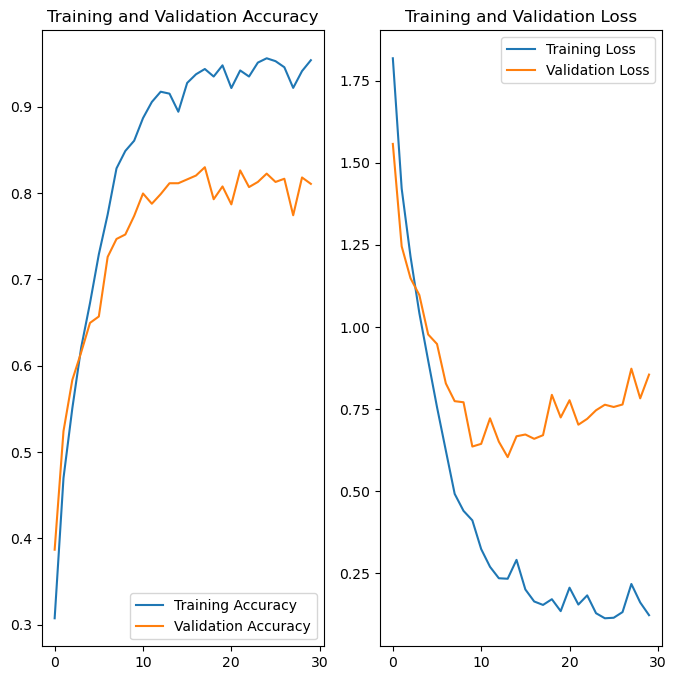

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Final Accuracy of the model

Training Accuracy = 95`

`Validation Accuracy = 81

Model Looks good to go 